## **HOMEWORK 2.1: City Grid Route Planning (A\* with Different Heuristics)** <br> <br>

Implement A* search with multiple heuristics and compare their performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap

In [2]:
#Creat e a city grid (0 = open, 1 = blocked)
np.random.seed(17)
grid_size = 30
city_grid = np.zeros((grid_size, grid_size))

#Add some blocked strees (obstacles)

#Vertical barriers
city_grid[5:15, 8] = 1
city_grid[15:25, 15] = 1
city_grid[10:20, 22] = 1

#Horizontal barriers
city_grid[8, 10:20] = 1
city_grid[15, 2:10] = 1
city_grid[22, 5:15] = 1

#Define star and end points
start = (2, 2)
goal = (27, 27)

#Random obstacles

#Number of random obstacles
n = 30
for _ in range (n):
    #Create n random obstacles around the map (may overlap to already existing obstacles)
    x, y = np.random.randint(0, grid_size, 2)
    
    #Make sure that start and goal are free
    if (x, y) != start and (x, y) != goal:
        city_grid[x, y] = 1

In [3]:
# Visualize the city grid
def visualize_grid(grid, start, goal, path=None, expanded=None, title="City Grid"):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Create color map
    display_grid = grid.copy()
    
    # Show expanded nodes in light blue
    if expanded:
        for node in expanded:
            if node != start and node != goal:
                display_grid[node] = 0.3
    
    # Show path in green
    if path:
        for node in path:
            if node != start and node != goal:
                display_grid[node] = 0.5
    
    cmap = ListedColormap(['white', 'black', 'lightblue', 'lightgreen'])
    ax.imshow(display_grid, cmap='gray', origin='lower')
    
    # Highlight expanded nodes
    if expanded:
        for node in expanded:
            if node != start and node != goal:
                ax.add_patch(Rectangle((node[1]-0.4, node[0]-0.4), 0.8, 0.8, 
                                      fill=True, facecolor='lightblue', alpha=0.5))
    
    # Highlight path
    if path:
        for i in range(len(path)-1):
            y1, x1 = path[i]
            y2, x2 = path[i+1]
            ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.3, head_length=0.2, 
                    fc='green', ec='green', linewidth=2, alpha=0.7)
    
    # Mark start and goal
    ax.plot(start[1], start[0], 'go', markersize=15, label='Warehouse (Start)')
    ax.plot(goal[1], goal[0], 'ro', markersize=15, label='Customer (Goal)')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


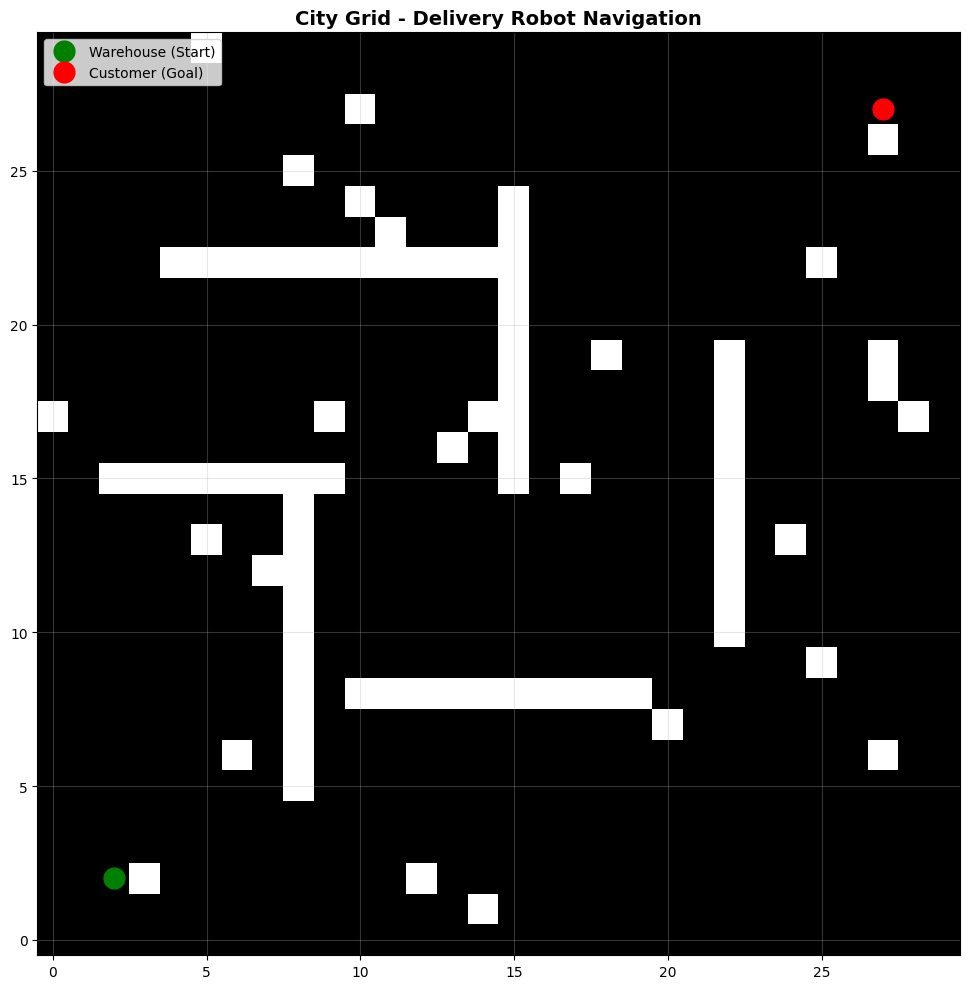

In [4]:
visualize_grid(city_grid, start, goal, title="City Grid - Delivery Robot Navigation")

In [5]:
#Heuristic functions

#Manhattan distance
def h_manhattan(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

#Euclidean distance
def h_euclidean(pos, goal):
    return np.sqrt(pow(pos[0] - goal[0], 2) + pow(pos[1] - goal[1], 2))

#Diagonal distance
def h_diagonal(pos, goal):
    D = 1
    D2 = np.sqrt(2)

    dx = abs(pos[0] - goal[0])
    dy = abs(pos[1] - goal[1])

    return D * (dx + dy) + (D2 - 2*D) * min(dx, dy)

#Inadmissible distance
def h_inadmissible(pos, goal):
    return 1.5 * h_diagonal(pos, goal)

#Zero heuristic - equivalent to uniform cost search
def h_zero(pos, goal):
    return 0



In [6]:
#Create a function to get the neighbors in the 8-directions

def get_neighbors_8_dir(pos, grid):
    neighbors = []
    costs = {}

    if grid[pos] == 1:
        return None

    for i in range (-1, 2):
        for j in range(-1, 2):
            #Don't count pos as a possbile neighbor
            if i == 0 and j == 0:
                continue

            temp_x = pos[0] + i
            temp_y = pos[1] + j
            possible_neighbor = (temp_x, temp_y)

            if (possible_neighbor[0] >= 0 and possible_neighbor[0] < grid_size) and (possible_neighbor[1] >= 0 and possible_neighbor[1] < grid_size):
                if grid[(possible_neighbor)] == 0:
                    neighbors.append(possible_neighbor)
                    if i == 0 or j == 0:
                        costs[possible_neighbor] = 1
                    else:
                        costs[possible_neighbor] = np.sqrt(2)
    
    return neighbors, costs



In [7]:
def astar_grid(grid, start, goal, heuristic):
    #Priority queue (f_score, counter, position)
    counter = 0 #Tie-breaker for nodes with the same f_score
    frontier = [(heuristic(start, goal), counter, start)]

    #Cost from start to node
    g_score = {start: None}

    #Track expanded nodes
    expanded = set()

    while frontier:
        f, _, current = heapq.heappop(frontier)

    return None, float('inf', set())

In [11]:
def astar_grid(grid, start, goal, heuristic):
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    parent = {start: None}

    open = []
    heapq.heappush(open, (0, start))

    closed = set()

    while open:
        _, current = heapq.heappop(open)

        if current in closed:
            continue

        closed.add(current)

        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
                

            path.reverse()

            return path, g_score[goal], closed

        neighbors, costs = get_neighbors_8_dir(current, grid)
        for neighbor in neighbors:
            if neighbor in closed:
                continue

            temp_g = g_score[current] + costs[neighbor]
            h =  heuristic(neighbor, goal)

            temp_f = temp_g + h

            if neighbor not in g_score or g_score[neighbor] > temp_g:
                parent[neighbor] = current
                g_score[neighbor] = temp_g
                f_score[neighbor] = temp_f

                if neighbor not in open:
                    heapq.heappush(open, (f_score[neighbor], neighbor))



    return None, float('inf'), set()

In [9]:
def test_heuristics(grid, start, goal):
    #Find the optimal cost
    _, optimal_cost,_ = astar_grid(grid, start, goal, h_zero)

    heuristics = [h_euclidean, h_diagonal, h_manhattan, h_inadmissible]

    for heuristic in heuristics:
        path, cost, expanded = astar_grid(grid, start, goal, heuristic)

        is_optimal = " Not Optimal"
        if cost - optimal_cost < 0.001:
            is_optimal = "Optimal"
        
        h_name = ""

        if heuristic is h_euclidean:
            h_name = "Euclidead"
        elif heuristic is h_diagonal:
            h_name = "Diagonal"
        elif heuristic is h_manhattan:
            h_name = "Manhattan"
        elif heuristic is h_inadmissible:
            h_name = "Inadmissible"

        title = h_name + " | " + "Cost = " + str(cost) + " | " + str(len(expanded)) + " | " + is_optimal

        visualize_grid(grid, start, goal, path, expanded, title)


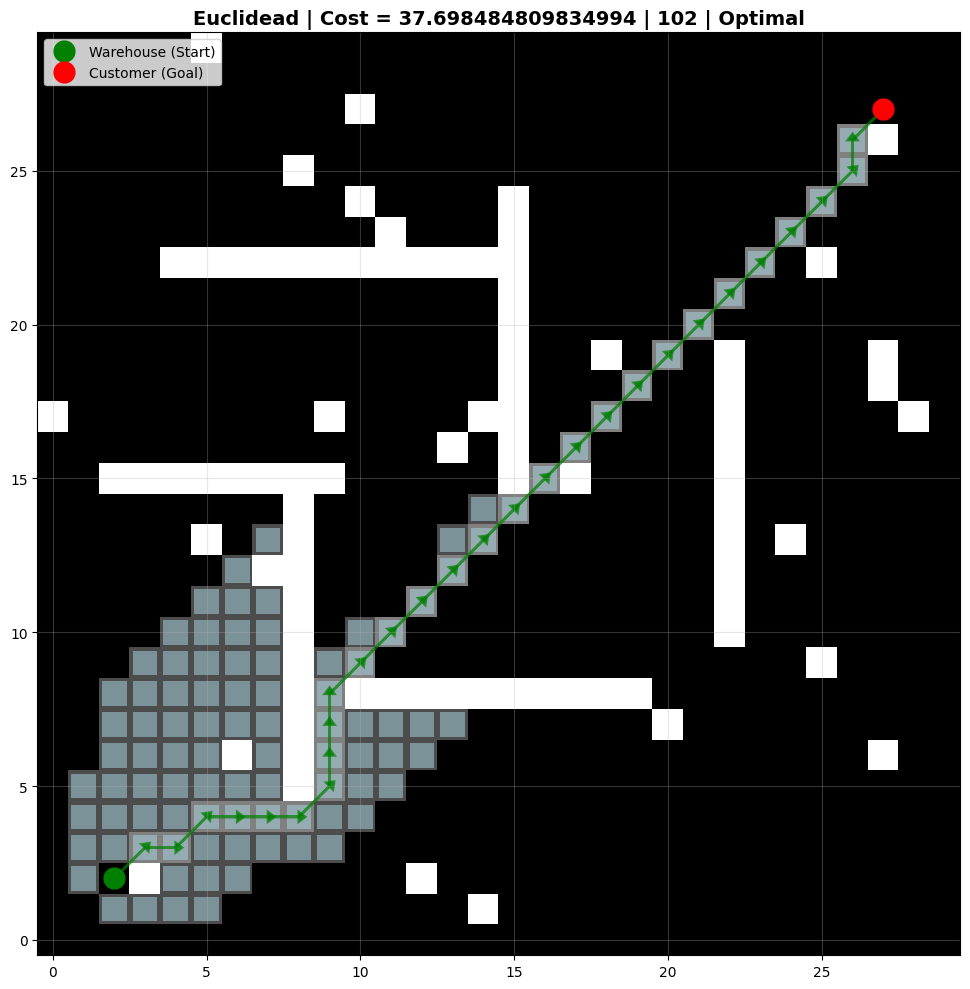

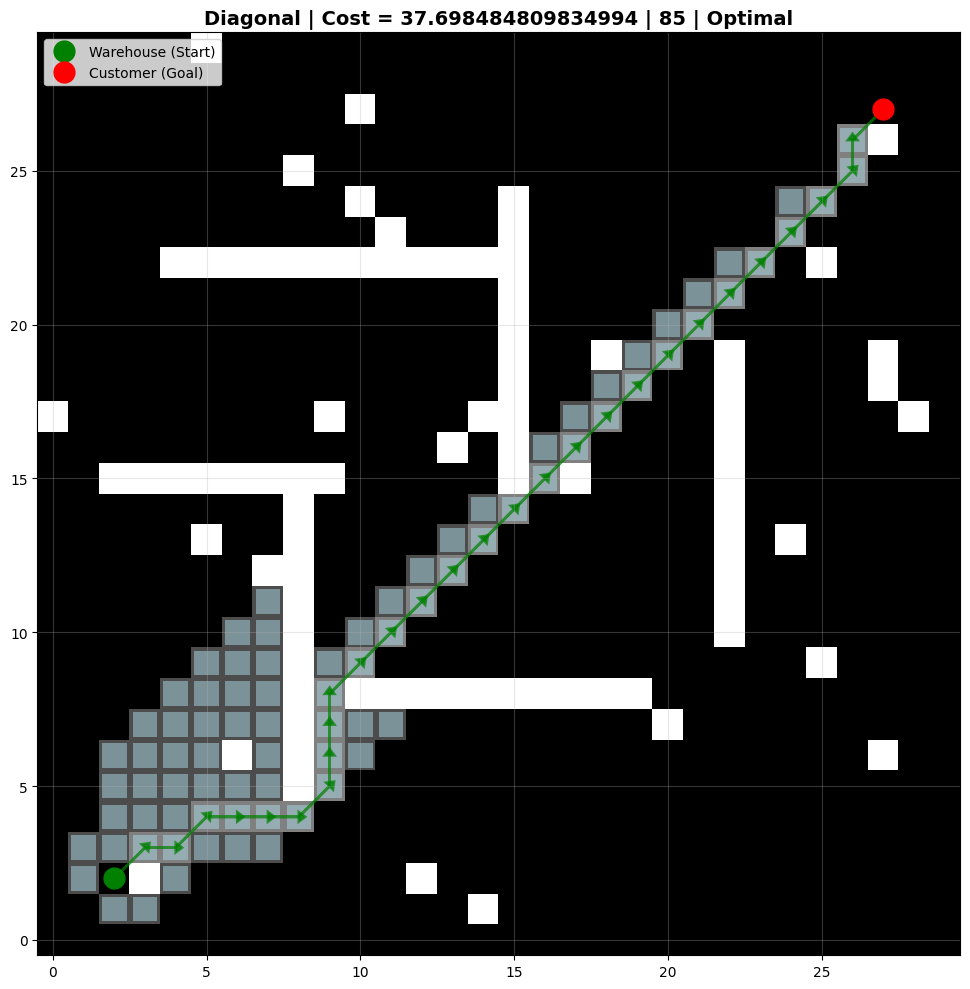

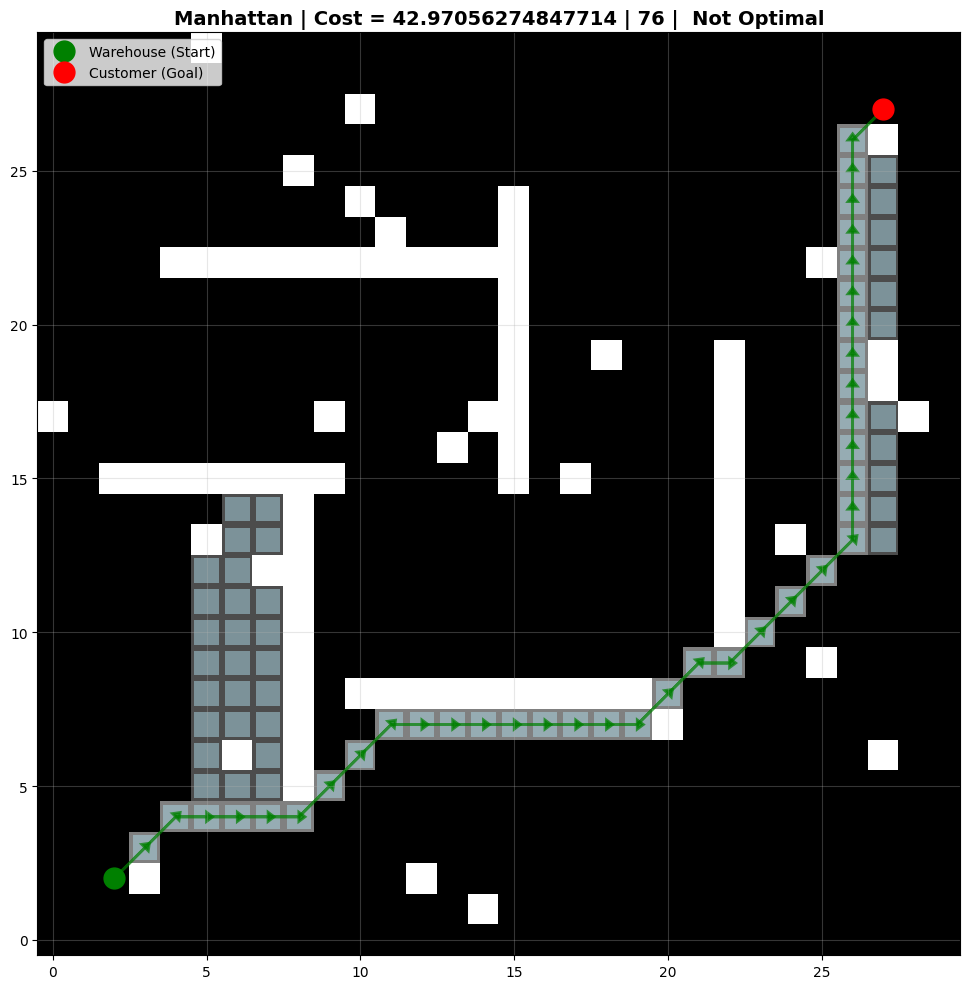

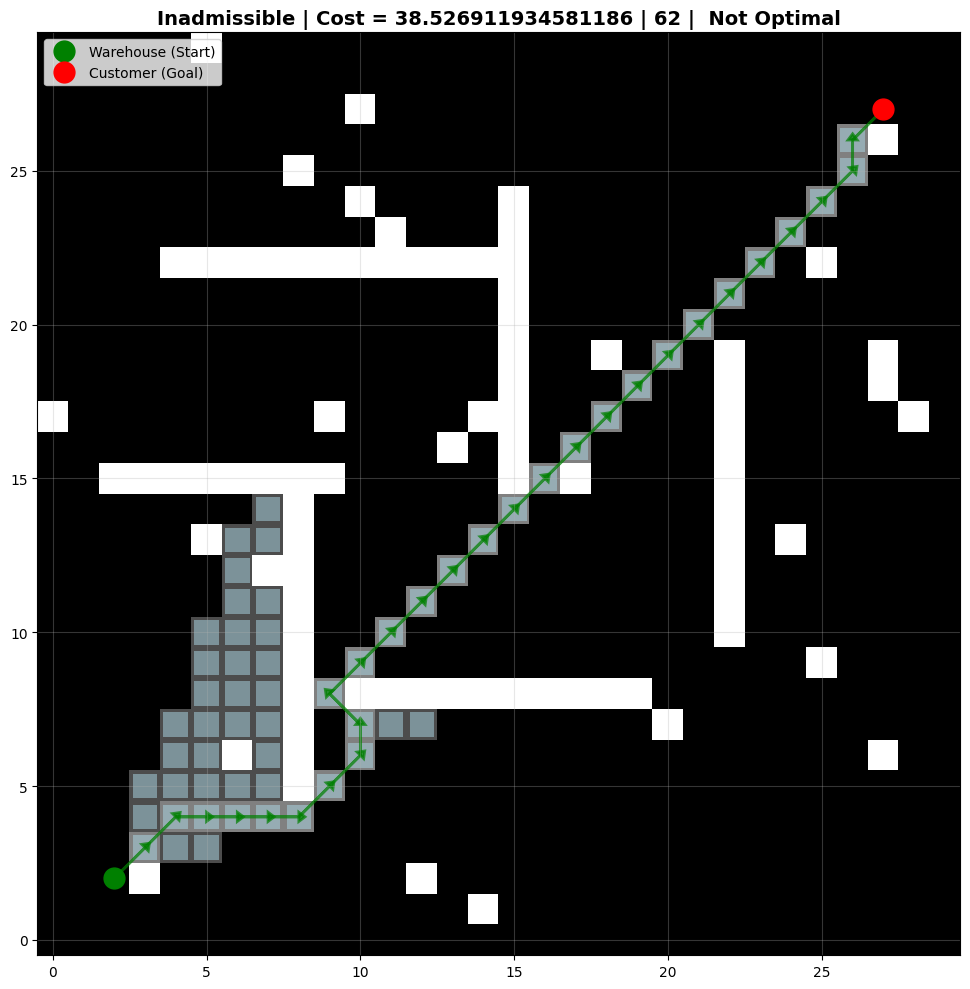

In [10]:
test_heuristics(city_grid, start, goal)